<a href="https://colab.research.google.com/github/rohitamar/AIAA/blob/main/emnist_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics

In [ ]:
train = pd.read_csv('emnist-balanced-train.csv', delimiter = ',')
test = pd.read_csv('emnist-balanced-test.csv', delimiter = ',')
map = pd.read_csv('emnist-balanced-mapping.txt', delimiter = ' ', index_col = 0, header = None, squeeze = True)

In [ ]:
train.shape

(112799, 785)

In [ ]:
test.shape

(18799, 785)

In [ ]:
map.shape

(47,)

In [ ]:
#height = 28, width = 28
train

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.494,0.495,0.496,0.497,0.498,0.499,0.500,0.501,0.502,0.503,0.504,0.505,0.506,0.507,0.508,0.509,0.510,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520,0.521,0.522,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112794,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,...,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112795,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112796,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112797,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
trainX = train.iloc[:,1:]
trainY = train.iloc[:,0]

testX = test.iloc[:,1:]
testY = test.iloc[:,0]

In [ ]:
trainX.shape

(112799, 784)

In [ ]:
#temporarily have no "rotation"
#this is just an adjustment to make the dataset into an image
def adjust(img):
  img = img.reshape([28, 28])
  img = np.fliplr(img)
  return img

trainX = np.asarray(trainX)
trainX = np.apply_along_axis(adjust, 1, trainX)

testX = np.asarray(testX)
testX = np.apply_along_axis(adjust, 1, testX)

In [ ]:
#normalize 0-1
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255
testX /= 255

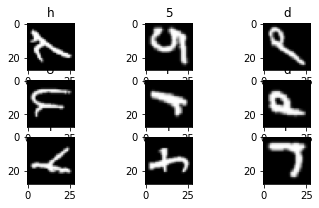

In [ ]:
for i in range(100, 109):
  plt.subplot(331 + i)
  plt.imshow(trainX[i], cmap = plt.get_cmap('gray'))
  plt.title(chr(map[trainY[i]]))

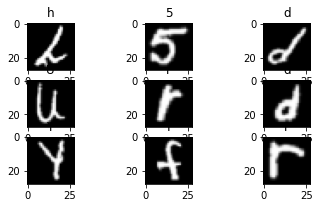

In [ ]:
#check later -- do we even need the rotation function
#what if the network is trained with rotated images in all 4 angles (90, 180, 270, 0)
#might compromise accuracy though
#look into this

def rot(img):
  img = img.reshape([28, 28])
  img = np.fliplr(img)
  img = np.rot90(img)
  return img

trainX = np.asarray(trainX)
trainX = np.apply_along_axis(rot, 1, trainX)

testX = np.asarray(testX)
testX = np.apply_along_axis(rot, 1, testX)

#normalize 0-1
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255
testX /= 255

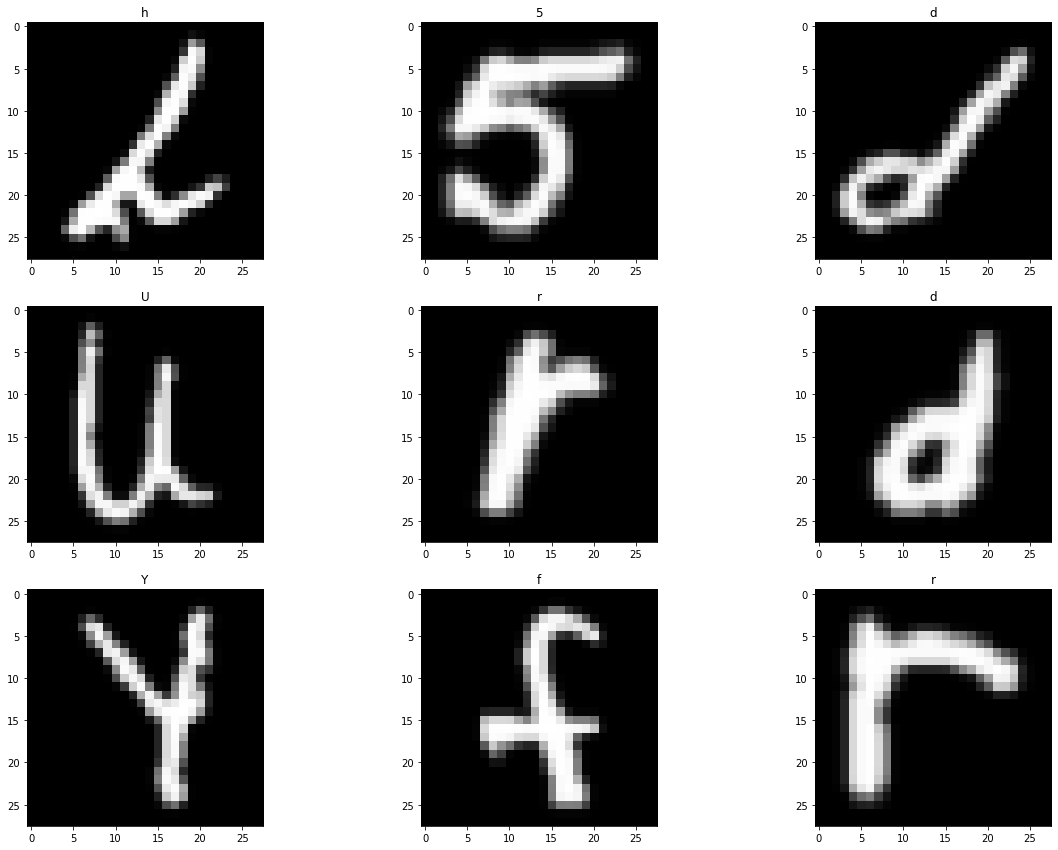

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100, 109):
  plt.subplot(331 + i)
  plt.imshow(trainX[i], cmap = plt.get_cmap('gray'))
  plt.title(chr(map[trainY[i]]))

In [ ]:
classes = trainY.nunique()

In [ ]:
#OHE
trainY = np_utils.to_categorical(trainY, classes)
testY = np_utils.to_categorical(trainY, classes)

In [ ]:
trainX = trainX.reshape(-1, 28, 28, 1)
testX = testX.reshape(-1, 28, 28, 1)

trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size = 0.10, random_state = 7)

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(.5))
model.add(Dense(units = classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(trainX, trainY, epochs=10, batch_size=512, verbose=1, validation_data=(valX, valY))

Epoch 1/10
199/199 [==============================] - 367s 2s/step - loss: 1.6021 - accuracy: 0.5485 - val_loss: 0.5630 - val_accuracy: 0.8198
Epoch 2/10
199/199 [==============================] - 347s 2s/step - loss: 0.7593 - accuracy: 0.7609 - val_loss: 0.4546 - val_accuracy: 0.8411
Epoch 3/10
199/199 [==============================] - 349s 2s/step - loss: 0.6197 - accuracy: 0.7986 - val_loss: 0.4178 - val_accuracy: 0.8536
Epoch 4/10
199/199 [==============================] - 358s 2s/step - loss: 0.5626 - accuracy: 0.8158 - val_loss: 0.3897 - val_accuracy: 0.8636
Epoch 5/10
199/199 [==============================] - 357s 2s/step - loss: 0.5180 - accuracy: 0.8269 - val_loss: 0.3782 - val_accuracy: 0.8660
Epoch 6/10
199/199 [==============================] - 352s 2s/step - loss: 0.4854 - accuracy: 0.8379 - val_loss: 0.3640 - val_accuracy: 0.8707
Epoch 7/10
199/199 [==============================] - 339s 2s/step - loss: 0.4619 - accuracy: 0.8448 - val_loss: 0.3631 - val_accuracy: 0.8701

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np
import cv2
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt

In [ ]:
img1 = cv2.imread("1.jpg", cv2.IMREAD_COLOR)

In [ ]:
ori = img1.reshape((img1.shape[0] * img1.shape[1], 3))
kmeans = KMeans(n_clusters = 3)
kmeans.fit(ori)

colors = kmeans.cluster_centers_

In [ ]:
colors

array([[173.45421245, 248.05738706, 155.02686203],
       [ 85.24813896, 144.5707196 , 109.58312655],
       [ 70.34782609, 228.72826087, 211.45108696]])

In [ ]:
labels = np.reshape(kmeans.labels_, (img1.shape[0], img1.shape[1]))

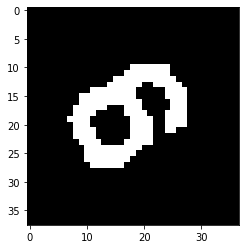

In [ ]:
img1 = cv2.imread("1.jpg", cv2.IMREAD_COLOR)
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        if labels[i][j] == 2:
            img1[i,j] = (255,255,255)
        else:
            img1[i,j] = (0,0,0)
plt.imshow(img1)

In [ ]:
img1.shape

(38, 37, 3)

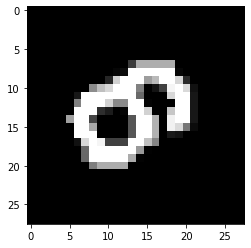

In [ ]:
#resize
img1= cv2.resize(img1, (28, 28))
plt.imshow(img1)

In [ ]:
a = []
#testing
#observation: grayscaled rgb have r = g = b

for i in range(28):
    b = []
    for j in range(28):
        b.append(img1[i][j][0])
    a.append(b)
    
from scipy.ndimage.interpolation import rotate
rotated = rotate(a, angle=61)

(28, 28)

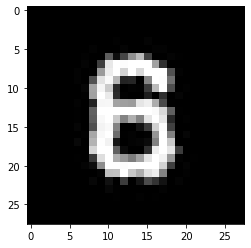

In [ ]:
slice = rotated[5:33, 5:33]
plt.imshow(slice, cmap = plt.get_cmap('gray'))
slice.shape

In [ ]:
slice

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,
          0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0,   0,   4,
          0,   0,   0,   3,   3,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
sm = slice/255

In [ ]:
sm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
testX

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [ ]:
sm = np.array([sm])

In [ ]:
sm

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
pred = model.predict(sm)

In [ ]:
pred

array([[1.5473548e-02, 2.8840580e-10, 3.0758431e-06, 2.4737650e-05,
        2.2876685e-07, 3.7058082e-03, 1.6301015e-03, 4.6420501e-10,
        1.9292261e-02, 4.0931195e-06, 1.3268851e-04, 5.7073301e-01,
        2.5383308e-05, 1.6920706e-02, 6.2326766e-03, 9.9484634e-05,
        4.9400419e-02, 3.1681751e-07, 5.7374479e-07, 1.4783109e-07,
        1.2900487e-07, 3.8332562e-08, 6.4800303e-09, 2.0208311e-07,
        3.7691530e-02, 2.6454036e-05, 8.0446843e-03, 4.9635178e-06,
        7.0836484e-03, 1.0533842e-09, 1.6862687e-06, 2.4378384e-09,
        6.9838819e-07, 8.5351382e-10, 2.9140413e-08, 2.7614703e-06,
        2.7767433e-02, 1.4440770e-01, 2.2996766e-03, 9.6550531e-04,
        5.0362610e-06, 8.4917560e-02, 1.9512594e-08, 1.1163910e-07,
        3.1002201e-03, 8.7453721e-08, 5.6637299e-07]], dtype=float32)

In [ ]:
pred = (pred > 0.5)

In [ ]:
pred

array([[False, False, False, False, False, False, False, False, False,
        False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])

In [ ]:
trainX

array([[[[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [ ]:
trainX[1]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.01568628],
        [0.01568628],
        [0.00784314],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
t = trainX[0]

In [ ]:
t = np.array([t])

In [ ]:
t

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.01176471],
         [0.00784314],
         

In [ ]:
model.predict(t)

array([[2.15841884e-12, 1.06152025e-10, 2.36533154e-10, 5.03940605e-11,
        7.33051380e-08, 4.00720914e-08, 5.28203037e-10, 2.21789289e-08,
        4.58668836e-08, 1.86148370e-07, 8.57249027e-09, 1.31715819e-10,
        5.13505904e-10, 1.72096522e-13, 5.44404379e-08, 3.26331645e-01,
        8.05198908e-07, 1.87577021e-09, 1.73876103e-07, 6.27239345e-08,
        4.90077001e-09, 6.35402104e-12, 3.42451978e-13, 1.52359340e-11,
        6.50871934e-13, 1.91325853e-06, 2.34527118e-08, 8.11146983e-10,
        8.35399590e-08, 7.08927871e-07, 2.82040474e-14, 3.83548748e-12,
        2.29955833e-12, 8.40530034e-10, 1.16805599e-09, 4.66633066e-10,
        1.60305191e-09, 1.54752822e-10, 1.70185588e-10, 5.91691418e-10,
        6.73620284e-01, 9.24241533e-07, 1.53044233e-09, 1.12187223e-12,
        3.76563503e-06, 3.39812686e-07, 3.88982044e-05]], dtype=float32)

In [ ]:
trainY

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model.predict(t) > 0.5

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False,
        False, False]])

TypeError: ignored

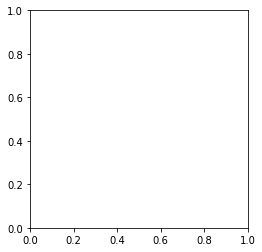

In [ ]:
plt.imshow(trainX[0])

In [ ]:
plt.title(chr(map[trainY[0]]))

TypeError: ignored

In [ ]:
trainX_ = train.iloc[:,1:]
trainY_ = train.iloc[:,0]

testX_ = test.iloc[:,1:]
testY_ = test.iloc[:,0]

In [ ]:
trainY_[0]

36

In [ ]:
chr(map[trainY_[0]])

'a'

In [ ]:
map

0
0      48
1      49
2      50
3      51
4      52
5      53
6      54
7      55
8      56
9      57
10     65
11     66
12     67
13     68
14     69
15     70
16     71
17     72
18     73
19     74
20     75
21     76
22     77
23     78
24     79
25     80
26     81
27     82
28     83
29     84
30     85
31     86
32     87
33     88
34     89
35     90
36     97
37     98
38    100
39    101
40    102
41    103
42    104
43    110
44    113
45    114
46    116
Name: 1, dtype: int64

[[ 33.92164179 134.66044776 116.44402985]
 [171.28554361 243.09199522 156.44205496]
 [ 85.725      105.95       196.025     ]]


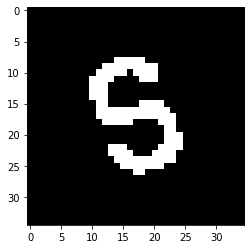

In [ ]:
img = cv2.imread("2.jpg", cv2.IMREAD_COLOR)
ori = img.reshape((img.shape[0] * img.shape[1], 3))
kmeans = KMeans(n_clusters = 3)
kmeans.fit(ori)

colors = kmeans.cluster_centers_
labels = np.reshape(kmeans.labels_, (img.shape[0], img.shape[1]))
print(colors)
img = cv2.imread("2.jpg", cv2.IMREAD_COLOR)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if labels[i][j] == 2:
            img[i,j] = (255,255,255)
        else:
            img[i,j] = (0,0,0)
plt.imshow(img)

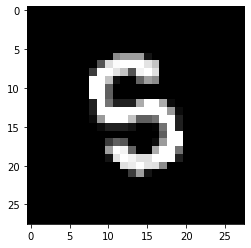

In [ ]:
img = cv2.resize(img, (28, 28))
plt.imshow(img)

In [ ]:
a = []
#testing
#observation: grayscaled rgb have r = g = b

for i in range(28):
    b = []
    for j in range(28):
        b.append(img[i][j][0])
    a.append(b)
    
from scipy.ndimage.interpolation import rotate
rotated = rotate(a, angle=345)

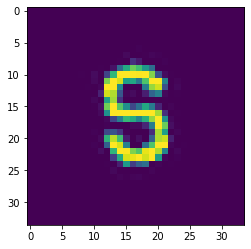

In [ ]:
plt.imshow(rotated)

(28, 28)

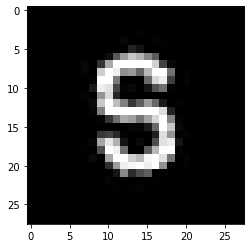

In [ ]:
slice = rotated[3:31, 3:31]
plt.imshow(slice, cmap = plt.get_cmap('gray'))
slice.shape

In [ ]:
sm = slice/255
sm

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
sm = np.array([sm])

In [ ]:
model.predict(sm)

array([[5.77613187e-04, 3.74364123e-10, 1.75347373e-06, 1.63199846e-04,
        2.76978000e-07, 3.89988050e-02, 4.39314317e-04, 3.20021315e-10,
        2.24132789e-03, 2.56284344e-04, 2.54369002e-06, 2.12783343e-03,
        2.67233008e-05, 1.08806023e-04, 2.66709574e-03, 1.18244195e-03,
        1.31494626e-02, 1.43785241e-08, 6.95093831e-07, 1.08416975e-06,
        6.17432292e-08, 1.04131503e-08, 4.07139034e-09, 1.33260167e-08,
        1.26244826e-03, 1.24541248e-05, 5.46485826e-04, 1.16913689e-07,
        8.31933618e-01, 1.68365091e-08, 3.49462290e-08, 7.07162884e-10,
        3.16391642e-08, 2.48967869e-09, 3.18000502e-07, 3.86725247e-07,
        3.16835096e-04, 7.48848019e-04, 3.70327484e-06, 4.24556056e-04,
        9.99256517e-05, 1.01542294e-01, 1.60490543e-09, 1.28103428e-09,
        1.16164517e-03, 3.00594849e-07, 6.37459266e-07]], dtype=float32)

In [ ]:
pred = model.predict(sm) > 0.5

In [ ]:
pred

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])

In [ ]:
#above prediction is correct, indeed a S (check through ASCII)

In [ ]:
map

0
0      48
1      49
2      50
3      51
4      52
5      53
6      54
7      55
8      56
9      57
10     65
11     66
12     67
13     68
14     69
15     70
16     71
17     72
18     73
19     74
20     75
21     76
22     77
23     78
24     79
25     80
26     81
27     82
28     83
29     84
30     85
31     86
32     87
33     88
34     89
35     90
36     97
37     98
38    100
39    101
40    102
41    103
42    104
43    110
44    113
45    114
46    116
Name: 1, dtype: int64

[[ 23.91459459 245.50162162 244.5427027 ]
 [ 27.07667732 120.7028754  115.00958466]
 [167.67938931  24.03053435  25.67175573]]


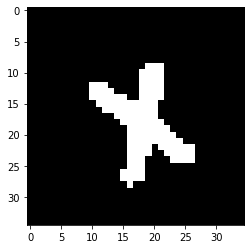

In [ ]:
img = cv2.imread("3.jpg", cv2.IMREAD_COLOR)
ori = img.reshape((img.shape[0] * img.shape[1], 3))
kmeans = KMeans(n_clusters = 3)
kmeans.fit(ori)

colors = kmeans.cluster_centers_
labels = np.reshape(kmeans.labels_, (img.shape[0], img.shape[1]))
print(colors)
img = cv2.imread("2.jpg", cv2.IMREAD_COLOR)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if labels[i][j] == 2:
            img[i,j] = (255,255,255)
        else:
            img[i,j] = (0,0,0)
plt.imshow(img)

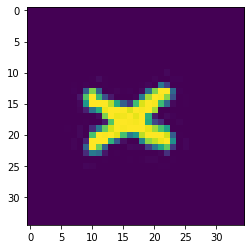

In [ ]:
img = cv2.resize(img, (28, 28))
a = []
#testing
#observation: grayscaled rgb have r = g = b

for i in range(28):
    b = []
    for j in range(28):
        b.append(img[i][j][0])
    a.append(b)
    
from scipy.ndimage.interpolation import rotate
rotated = rotate(a, angle=252)
plt.imshow(rotated)

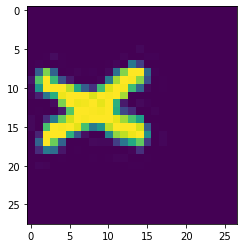

In [ ]:
slice = rotated[5:33, 8:36]
plt.imshow(slice)

In [ ]:
sm = np.array([slice/255])
pred = model.predict(sm) > 0.5

In [ ]:
pred

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])

In [ ]:
pred[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [ ]:
index = np.where(pred[0] == True)

In [ ]:
index

(array([33]),)

In [ ]:
#use this network for letters (obviously, we gotta make finetune this -- this notebook is a test run)

In [ ]:
model.predict(sm)

array([[5.50810508e-11, 3.16968226e-07, 9.93070088e-08, 3.62037414e-11,
        2.69993905e-07, 4.01499392e-07, 6.20257231e-12, 1.09325207e-08,
        5.87705581e-04, 3.67971637e-07, 4.41581705e-08, 9.07022635e-09,
        1.44600082e-10, 2.65545114e-10, 8.49338111e-09, 2.24133867e-08,
        3.79829015e-11, 2.61548337e-07, 5.15125521e-07, 2.39837128e-08,
        4.58374598e-05, 9.83994937e-07, 1.29101352e-07, 1.76523315e-06,
        4.36052063e-11, 9.54078949e-09, 6.83554671e-11, 6.47881848e-07,
        1.09815126e-07, 8.46258899e-06, 1.75332934e-06, 2.81531044e-07,
        1.61865525e-08, 9.97321784e-01, 1.61745260e-03, 7.18032197e-07,
        8.53780364e-07, 6.26526955e-08, 1.93448784e-07, 3.06323713e-08,
        5.49141355e-08, 3.13118071e-05, 4.49145182e-06, 3.63779327e-05,
        2.52883419e-05, 3.00536747e-04, 1.08403547e-05]], dtype=float32)

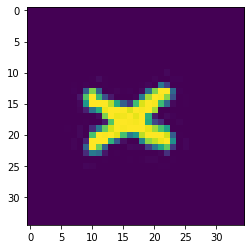

In [ ]:
img = cv2.resize(img, (28, 28))
a = []
#testing
#observation: grayscaled rgb have r = g = b

for i in range(28):
    b = []
    for j in range(28):
        b.append(img[i][j][0])
    a.append(b)
    
from scipy.ndimage.interpolation import rotate
rotated = rotate(a, angle=252)
plt.imshow(rotated)

In [ ]:
slice = rotated[5:33, 3:31]

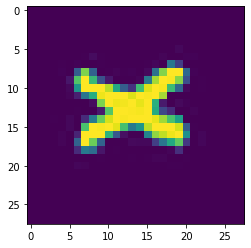

In [ ]:
plt.imshow(slice)

In [ ]:
sm = np.array([slice/255])

In [ ]:
sm

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
pred = model.predict(sm) > 0.5

In [ ]:
pred

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])

In [ ]:
np.where(pred == True)

(array([0]), array([33]))

In [ ]:
map

0
0      48
1      49
2      50
3      51
4      52
5      53
6      54
7      55
8      56
9      57
10     65
11     66
12     67
13     68
14     69
15     70
16     71
17     72
18     73
19     74
20     75
21     76
22     77
23     78
24     79
25     80
26     81
27     82
28     83
29     84
30     85
31     86
32     87
33     88
34     89
35     90
36     97
37     98
38    100
39    101
40    102
41    103
42    104
43    110
44    113
45    114
46    116
Name: 1, dtype: int64

[[ 36.76190476  61.52380952  70.63186813]
 [ 19.84632768 210.88474576 244.89943503]
 [141.1         78.91111111 236.6       ]]


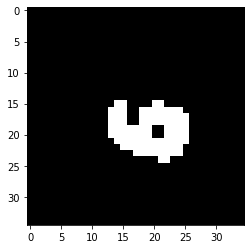

In [ ]:
img = cv2.imread("9.jpg", cv2.IMREAD_COLOR)
ori = img.reshape((img.shape[0] * img.shape[1], 3))
kmeans = KMeans(n_clusters = 3)
kmeans.fit(ori)

colors = kmeans.cluster_centers_
labels = np.reshape(kmeans.labels_, (img.shape[0], img.shape[1]))
print(colors)
img = cv2.imread("2.jpg", cv2.IMREAD_COLOR)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if labels[i][j] == 2:
            img[i,j] = (255,255,255)
        else:
            img[i,j] = (0,0,0)
plt.imshow(img)
img = cv2.resize(img, (28, 28))
a = []

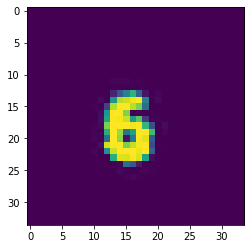

In [ ]:
#testing
#observation: grayscaled rgb have r = g = b
a = []
for i in range(28):
    b = []
    for j in range(28):
        b.append(img[i][j][0])
    a.append(b)
    
from scipy.ndimage.interpolation import rotate
rotated = rotate(a, angle=284)
plt.imshow(rotated)

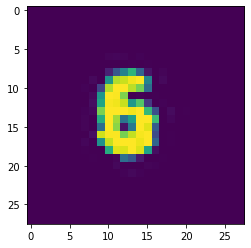

In [ ]:
slice = rotated[5:33,3:31]
plt.imshow(slice)

In [ ]:
sm = np.array([slice/255])
pred = model.predict(sm) > 0.5

In [ ]:
pred

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])

In [ ]:
#^^ no valid prediction

In [ ]:
img = cv2.imread("14.jpg", cv2.IMREAD_COLOR)
ori = img.reshape((img.shape[0] * img.shape[1], 3))
kmeans = KMeans(n_clusters = 3)
kmeans.fit(ori)

colors = kmeans.cluster_centers_
labels = np.reshape(kmeans.labels_, (img.shape[0], img.shape[1]))
print(colors)


[[ 81.95714286  83.60714286  93.0047619 ]
 [ 65.05392157 102.34313725 140.78186275]
 [ 30.77       195.64        66.        ]]


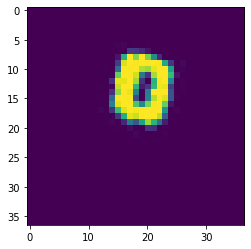

In [ ]:
img = cv2.imread("14.jpg", cv2.IMREAD_COLOR)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if labels[i][j] == 2:
            img[i,j] = (255,255,255)
        else:
            img[i,j] = (0,0,0)
#plt.imshow(img)
img = cv2.resize(img, (28, 28))
a = []
for i in range(28):
    b = []
    for j in range(28):
        b.append(img[i][j][0])
    a.append(b)
    
from scipy.ndimage.interpolation import rotate
rotated = rotate(a, angle=205)
plt.imshow(rotated)

In [ ]:
slice = rotated[0:28,6:34]

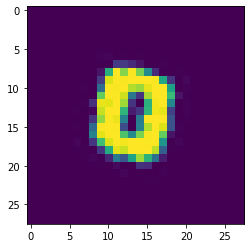

In [ ]:
plt.imshow(slice)

In [ ]:
sm = np.array([slice])
pred = model.predict(sm) > 0.5

In [ ]:
pred

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False]])

In [ ]:
np.where(pred == True)

(array([0]), array([24]))

In [ ]:
map

0
0      48
1      49
2      50
3      51
4      52
5      53
6      54
7      55
8      56
9      57
10     65
11     66
12     67
13     68
14     69
15     70
16     71
17     72
18     73
19     74
20     75
21     76
22     77
23     78
24     79
25     80
26     81
27     82
28     83
29     84
30     85
31     86
32     87
33     88
34     89
35     90
36     97
37     98
38    100
39    101
40    102
41    103
42    104
43    110
44    113
45    114
46    116
Name: 1, dtype: int64

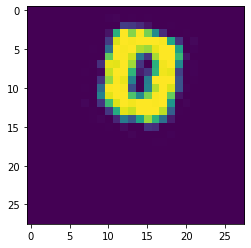

In [ ]:
slice = rotated[5:33,5:33]
plt.imshow(slice)

In [ ]:
#testing to see if neural network needs the letter/number to be centered

sm = np.array([slice/255])
pred = model.predict(sm) > 0.5

In [ ]:
np.where(pred == True)

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
#seems like it needs to be centered

In [ ]:
img = cv2.imread("17.jpg", cv2.IMREAD_COLOR)
ori = img.reshape((img.shape[0] * img.shape[1], 3))
kmeans = KMeans(n_clusters = 3)
kmeans.fit(ori)

colors = kmeans.cluster_centers_
labels = np.reshape(kmeans.labels_, (img.shape[0], img.shape[1]))
print(colors)

[[ 13.76903553 122.71827411 119.16243655]
 [155.75806452 215.25       188.81451613]
 [ 17.64747356 248.42185664 246.97297297]]


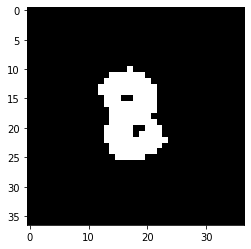

In [ ]:
img = cv2.imread("17.jpg", cv2.IMREAD_COLOR)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if labels[i][j] == 1:
            img[i,j] = (255,255,255)
        else:
            img[i,j] = (0,0,0)
plt.imshow(img)
img = cv2.resize(img, (28, 28))
a = []
for i in range(28):
    b = []
    for j in range(28):
        b.append(img[i][j][0])
    a.append(b)
    
from scipy.ndimage.interpolation import rotate
rotated = rotate(a, angle=205)
#plt.imshow(rotated)